# Logistic Regression 실습
(product_김혜빈)

# 1. 실습용 데이터 설정
- import Package
   - Product.csv

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/product.csv')
df.info()
# 15009행 12열
# y = customerType(online, offline)
# X = totalOrder

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15009 entries, 0 to 15008
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           15009 non-null  object 
 1   meanPriceEach  15009 non-null  float64
 2   totalOrder     15009 non-null  float64
 3   orderType_1    15009 non-null  float64
 4   orderType_2    15009 non-null  float64
 5   orderType_3    15009 non-null  float64
 6   totalBundle    15009 non-null  float64
 7   bundleType_1   15009 non-null  float64
 8   bundleType_2   15009 non-null  float64
 9   customerType   15009 non-null  object 
 10  FY             15009 non-null  int64  
 11  Country        15009 non-null  int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 1.4+ MB


In [ ]:
df.head()

,Date,meanPriceEach,totalOrder,orderType_1,orderType_2,orderType_3,totalBundle,bundleType_1,bundleType_2,customerType,FY,Country
0,2015-01-04,1.56,58065.35,10049.66,25228.37,3672.89,19114.43,17280.89,1833.54,Online,2015,25
1,2015-01-04,1.10,2578275.12,575245.44,1311502.53,181058.65,510468.50,429166.89,80986.81,Offline,2015,25
2,2015-01-11,1.17,2335986.11,560119.16,1032606.49,191515.19,551745.27,465764.93,85966.27,Offline,2015,25
3,2015-01-11,1.52,65483.08,14570.74,30445.75,3170.11,17296.48,16715.45,581.03,Online,2015,25
4,2015-01-18,1.65,52559.10,11415.28,25306.56,3345.08,12492.18,10971.43,1520.75,Online,2015,25


# 2. 탐색적 데이터 분석

> ## 1) 빈도분석

In [ ]:
df.customerType.value_counts()

Offline    7506
Online     7503
Name: customerType, dtype: int64

> ## 2) 분포 시각화

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


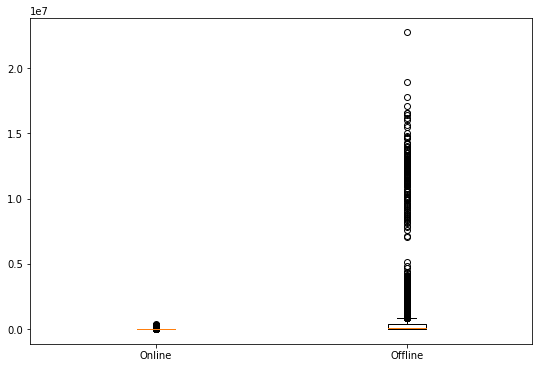

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (9, 6))
plt.boxplot([df[df.customerType == 'Online'].orderType_1,
             df[df.customerType == 'Offline'].orderType_1],
            labels = ['Online', 'Offline'])
plt.show()

# 3. Data Preprocessing
> ## 1) Standardization : 표준화

In [ ]:
X = df[['orderType_1']]
y = df['customerType']

In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)
X_Scaled[:5]

array([[-0.22387636],
       [ 0.22273888],
       [ 0.21078616],
       [-0.22030383],
       [-0.22279726]])

> ## 2) Train & Test Split

- 7 : 3

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)
print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (10506, 1) (10506,)
Test Data :  (4503, 1) (4503,)


# 3. Modeling

> 1) Train_Data로 모델 생성

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train) 
# train 데이터로 학습모델 만들기
# X에는 문자형 데이터 불가, y에는 sklearn에서 문자형 데이터 가능

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

> ## 2) Test_Data에 Model 적용

In [ ]:
# 학습된 모델에서 예측값 4503개 (y_hat) 뽑아내기(predict 메서드 이용) 
y_hat = model_lr.predict(X_test)
y_hat 

array(['Online', 'Offline', 'Offline', ..., 'Online', 'Online', 'Online'],
      dtype=object)

# 4. Model Validation
> ## 1) Accuracy

- Train Accuracy

In [ ]:
model_lr.score(X_train, y_train)

0.8233390443556063

- Test Accuracy

In [ ]:
model_lr.score(X_test, y_test)

0.8194536975349767

> ## 2) Confusion Matrix

- 'Offline' 기준
   - (2,2)가 크게 나오게 기준을 정한다
   - 알파벳 순서

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_hat)

array([[1488,  739],
       [  74, 2202]])

- 'Online' 기준
   - (1,1)이 더 크게 나온 것은 사용하지 않는다

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_hat, labels = ['Online', 'Offline'])

array([[2202,   74],
       [ 739, 1488]])

> ## 3) Accuracy - 'Offline'
 - 기준은 어디에 두느냐가 중요함
    - 'Online'에 기준을 두는 것보다 'Offline'에 기준을 두는 것이 적합

In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_hat))
# 81.9%는 Offline이 Offline으로, Online이 Online으로 맞게 분류됐다.

0.8194536975349767


> ## 4) F1_Score - 'Offline'

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_hat, pos_label = 'Offline')


0.7854315122723673

> ## 추가 5) Precision, Recall - 'Offline'

In [ ]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_test, y_hat, pos_label = 'Offline')) 
print(recall_score(y_test, y_hat, pos_label = 'Offline'))
# Offline으로 분류하고 실제로 Offline인 비율이 95.3%
# 실제 Offline 중 Offline으로 분류된 비율 66.8%

0.9526248399487837
0.6681634485855411


# 더 해볼 수 있는 것

- CEE 
   - 함수 지정, 종속변수 인코딩
- 탐색적 분석 시각화
   - On,Offline에 따른 orderType_1의 차이가 커서 다른 시각화를 써보고 싶다. ex) 막대그래프


In [ ]:
def CEE(y, y_hat):
   a = -y * log(y_hat) - (1 - y) * log(1 - y_hat)
   return a

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder1 = LabelEncoder()
y_test_1 = encoder1.fit_transform(y_test)

In [ ]:
CEE(y_test_1, y_hat)